In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from matplotlib.animation import FuncAnimation

Frecuencias Naturales: ω₁=2.257 rad/s, ω₂=11.500 rad/s

Forma de los Modos (vectores A):
Modo 1 (ω₁): A₁ = [-0.19258751 -0.20801829]
Modo 2 (ω₂): A₂ = [-0.9812798   1.05990332]


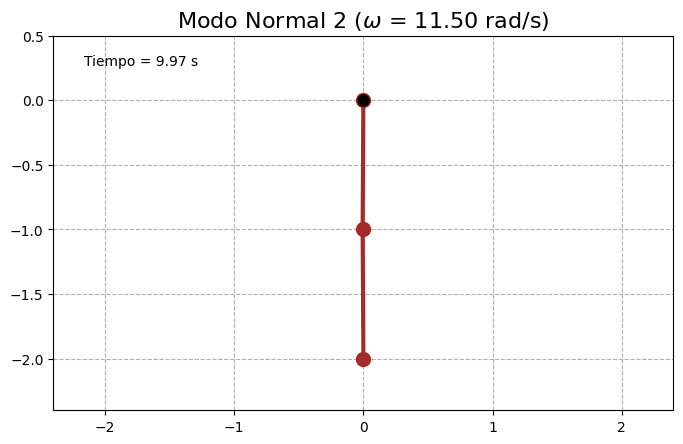

In [3]:
# Parametros del sistema
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 5.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s^2)

# Parámetros del modelo discreto n=2
a = L / 2
m1 = m / 2
m2_prime = m / 2 + M # Se usa m2_prime para claridad (m_2' en la deducción)

# MATRICES DE ENERGÍA (T y V) 

T_matrix = (a**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,      m2_prime]
])

V_matrix = (g * a) * np.array([
    [m1 + m2_prime, 0],
    [0,             m2_prime]
])

# CÁLCULO DE MODOS NORMALES Y FRECUENCIAS 
# Resuelve el problema generalizado de eigenvalores: V*A = w^2*T*A
omega_sq, modos = eigh(V_matrix, T_matrix) 

# Las columnas de la matriz 'modos' son los vectores de modo normal (A)
omegas = np.sqrt(omega_sq)
print(f"Frecuencias Naturales: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s")
print("\nForma de los Modos (vectores A):")
print(f"Modo 1 (ω₁): A₁ = {modos[:, 0]}")
print(f"Modo 2 (ω₂): A₂ = {modos[:, 1]}")


# CONFIGURACIÓN DE LA ANIMACIÓN 

# Elige qué modo normal quieres ver (0 para el primero, 1 para el segundo)
MODO_A_ANIMAR = 1 

omega_anim = omegas[MODO_A_ANIMAR]
modo_shape = modos[:, MODO_A_ANIMAR]

# Amplitud de la oscilación para la visualización (en radianes)
# La amplitud real dependería de las condiciones iniciales
AMP_PLOT = 0.1 

# Configuración del gráfico (idéntico al anterior)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Modo Normal {MODO_A_ANIMAR + 1} ($\omega$ = {omega_anim:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='brown')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    """Función de inicialización para la animación."""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    """Función que actualiza cada cuadro de la animación."""
    t = frame / 30.0
    
    # La solución para un modo normal es A * cos(ω*t)
    # Theta(t) = Amplitud * [forma_del_modo] * cos(ω*t)
    theta1 = AMP_PLOT * modo_shape[0] * np.cos(omega_anim * t)
    theta2 = AMP_PLOT * modo_shape[1] * np.cos(omega_anim * t)
    
    # Coordenadas (y-axis apunta hacia arriba)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Tiempo = {t:.2f} s')
    return line, time_text

# --- GENERACIÓN Y GUARDADO DE LA ANIMACIÓN ---
num_frames = 10 * 30 # 10 segundos de animación
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)

# Guardar la animación (necesita tener 'pillow' y/o 'ffmpeg' instalado)
output_filename = f'animacion_modo_{MODO_A_ANIMAR + 1}'
ani.save(output_filename + '.gif', writer='pillow', fps=30)
# ani.save(output_filename + '.mp4', writer='ffmpeg', fps=30, dpi=150)

plt.show()

Frecuencias naturales: ω₁ = 2.324 rad/s, ω₂ = 7.312 rad/s
Frecuencia de forzamiento: Ω = 6.946 rad/s
Amplitudes: A₁ = -0.088 rad, A₂ = 0.084 rad


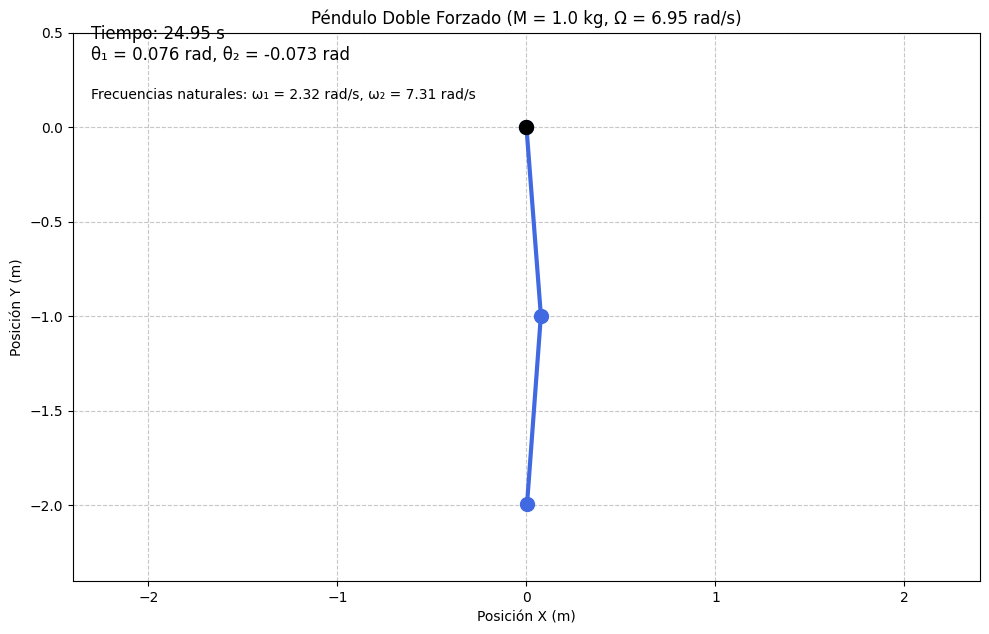

In [4]:
# Con término forzante
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 1.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s²)
F0 = 2.0     # Amplitud de la fuerza de forzamiento (N)
l = L / 2    # Longitud de cada péndulo

# Masas equivalentes
m1 = m / 2       # Masa del primer péndulo
m2_prime = m/2 + M  # Masa efectiva del segundo péndulo (incluye M)

# --- MATRICES T Y V SEGÚN DEDUCCIÓN ---
# Matriz de energía cinética T
T_matrix = (l**2) * np.array([
    [m1 + m2_prime, m2_prime],
    [m2_prime,       m2_prime]
])

# Matriz de energía potencial V
V_matrix = (g * l) * np.array([
    [m1 + m2_prime, 0],
    [0,              m2_prime]
])

# --- CÁLCULO DE FRECUENCIAS NATURALES ---
# Resolver problema de autovalores generalizado: V·a = ω²·T·a
omega_sq, modes = eigh(V_matrix, T_matrix) 
omegas = np.sqrt(omega_sq)
print(f"Frecuencias naturales: ω₁ = {omegas[0]:.3f} rad/s, ω₂ = {omegas[1]:.3f} rad/s")

# --- CONFIGURACIÓN DE FORZAMIENTO ---
Omega = omegas[1] * 0.95  # Frecuencia cerca de ω₂
print(f"Frecuencia de forzamiento: Ω = {Omega:.3f} rad/s")

# Vector de fuerza generalizada (mismo que ejemplo)
Q0 = l * F0 * np.array([1.0, 1.0])

# --- CÁLCULO DE AMPLITUDES ---
# Matriz dinámica: K_dyn = V - Ω²·T
K_dyn = V_matrix - (Omega**2) * T_matrix

# Resolver: K_dyn·A = Q0
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes: A₁ = {A[0]:.3f} rad, A₂ = {A[1]:.3f} rad")

# --- ANIMACIÓN ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'Péndulo Doble Forzado (M = {M} kg, Ω = {Omega:.2f} rad/s)')
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='royalblue')
pivot = ax.plot(0, 0, 'ko', markersize=10)[0]
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
info_text = ax.text(0.02, 0.88, '', transform=ax.transAxes, fontsize=10)

def init():
    line.set_data([], [])
    time_text.set_text('')
    info_text.set_text(f'Frecuencias naturales: ω₁ = {omegas[0]:.2f} rad/s, ω₂ = {omegas[1]:.2f} rad/s')
    return line, time_text, info_text

def update(frame):
    t = frame * 0.05  # Paso de tiempo
    
    # Ángulos (solución forzada)
    theta1 = A[0] * np.cos(Omega * t)
    theta2 = A[1] * np.cos(Omega * t)
    
    # Posiciones de las masas
    x1 = l * np.sin(theta1)
    y1 = -l * np.cos(theta1)
    x2 = x1 + l * np.sin(theta2)
    y2 = y1 - l * np.cos(theta2)
    
    # Actualizar línea
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(f'Tiempo: {t:.2f} s\n'
                      f'θ₁ = {theta1:.3f} rad, θ₂ = {theta2:.3f} rad')
    return line, time_text, pivot

# Configuración de animación
ani = FuncAnimation(fig, update, frames=500,
                    init_func=init, blit=True, interval=20)

# Guardar animación (opcional)
ani.save('pendulo_forzado_n2.gif', writer='pillow', fps=25)
# ani.save('pendulo_forzado_n2.mp4', writer='ffmpeg', fps=25, dpi=150)

plt.tight_layout()
plt.show()

Frecuencias Naturales: ω₁=2.266 rad/s, ω₂=12.106 rad/s, ω₃=20.547 rad/s

Forma de los Modos (vectores A):
Modo 1 (ω₁): A₁ = [0.19246051 0.20564767 0.21349231]
Modo 2 (ω₂): A₂ = [-1.22878648 -0.06987157  1.44360066]
Modo 3 (ω₃): A₃ = [ 1.35205131 -2.58898185  1.28159939]


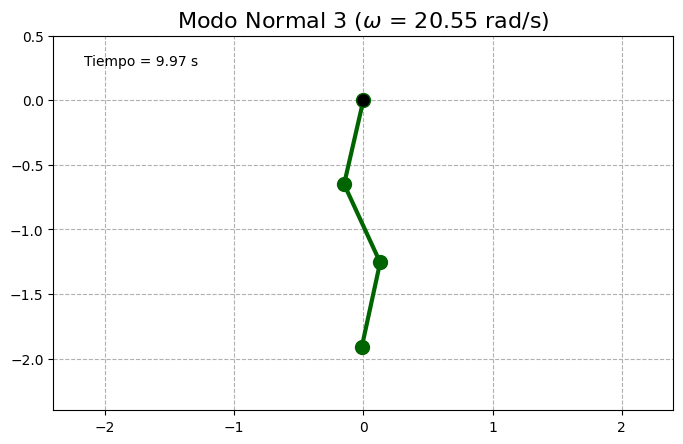

In [5]:
#PARÁMETROS DEL SISTEMA 
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 5.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s^2)

# Parámetros del modelo discreto n=3
a = L / 3
m1 = m / 3
m2 = m / 3
m3_prime = m / 3 + M # m_3' en la deducción

# --- MATRICES DE ENERGÍA (T y V) ---
# Basado en la deducción explícita del péndulo triple

# Coeficientes comunes para T y V para mayor claridad
c1 = m1 + m2 + m3_prime # == m + M
c2 = m2 + m3_prime      # == 2m/3 + M
c3 = m3_prime           # == m/3 + M

T_matrix = (a**2) * np.array([
    [c1, c2, c3],
    [c2, c2, c3],
    [c3, c3, c3]
])

V_matrix = (g * a) * np.array([
    [c1, 0,  0 ],
    [0,  c2, 0 ],
    [0,  0,  c3]
])

# --- CÁLCULO DE MODOS NORMALES Y FRECUENCIAS ---
# Resuelve el problema generalizado de eigenvalores: V*A = w^2*T*A
omega_sq, modos = eigh(V_matrix, T_matrix) 

# Las columnas de la matriz 'modos' son los vectores de modo normal (A)
omegas = np.sqrt(omega_sq)
print(f"Frecuencias Naturales: ω₁={omegas[0]:.3f} rad/s, ω₂={omegas[1]:.3f} rad/s, ω₃={omegas[2]:.3f} rad/s")
print("\nForma de los Modos (vectores A):")
print(f"Modo 1 (ω₁): A₁ = {modos[:, 0]}")
print(f"Modo 2 (ω₂): A₂ = {modos[:, 1]}")
print(f"Modo 3 (ω₃): A₃ = {modos[:, 2]}")


# --- CONFIGURACIÓN DE LA ANIMACIÓN ---

# Elige qué modo normal quieres ver (0, 1, o 2)
MODO_A_ANIMAR = 2

omega_anim = omegas[MODO_A_ANIMAR]
modo_shape = modos[:, MODO_A_ANIMAR]

# Amplitud de la oscilación para la visualización (en radianes)
AMP_PLOT = 0.2

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--')
ax.set_title(f'Modo Normal {MODO_A_ANIMAR + 1} ($\omega$ = {omega_anim:.2f} rad/s)', fontsize=16)

line, = ax.plot([], [], 'o-', lw=3, markersize=10, color='darkgreen')
pivot, = ax.plot([0], [0], 'ko', markersize=8)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top')

def init():
    """Función de inicialización para la animación."""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    """Función que actualiza cada cuadro de la animación."""
    t = frame / 30.0
    
    # La solución para un modo normal es A * cos(ω*t)
    theta1 = AMP_PLOT * modo_shape[0] * np.cos(omega_anim * t)
    theta2 = AMP_PLOT * modo_shape[1] * np.cos(omega_anim * t)
    theta3 = AMP_PLOT * modo_shape[2] * np.cos(omega_anim * t)
    
    # Coordenadas (y-axis apunta hacia arriba)
    x1 = a * np.sin(theta1)
    y1 = -a * np.cos(theta1)
    x2 = x1 + a * np.sin(theta2)
    y2 = y1 - a * np.cos(theta2)
    x3 = x2 + a * np.sin(theta3)
    y3 = y2 - a * np.cos(theta3)

    line.set_data([0, x1, x2, x3], [0, y1, y2, y3])
    time_text.set_text(f'Tiempo = {t:.2f} s')
    return line, time_text

# --- GENERACIÓN Y GUARDADO DE LA ANIMACIÓN ---
num_frames = 10 * 30 # 10 segundos de animación
ani = FuncAnimation(fig, update, frames=num_frames,
                    init_func=init, blit=True, interval=1000/30)

# Guardar la animación (necesita tener 'pillow' y/o 'ffmpeg' instalado)
output_filename = f'animacion_n3_modo_{MODO_A_ANIMAR + 1}'
ani.save(output_filename + '.gif', writer='pillow', fps=30)
# ani.save(output_filename + '.mp4', writer='ffmpeg', fps=30, dpi=150)

plt.show()

Frecuencias naturales: ω₁ = 2.266 rad/s, ω₂ = 12.106 rad/s, ω₃ = 20.547 rad/s
Frecuencia de forzamiento: Ω = 20.342 rad/s
Amplitudes: A₁ = 0.010 rad, A₂ = -0.019 rad, A₃ = 0.008 rad


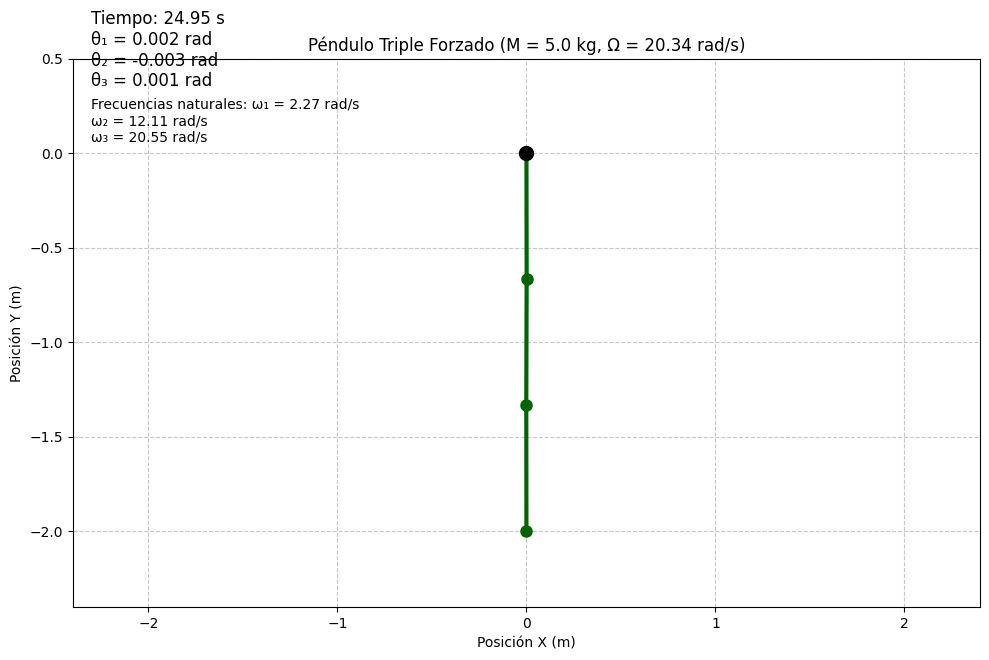

In [7]:
# --- PARÁMETROS DEL SISTEMA ---
L = 2.0      # Longitud total de la cuerda (m)
m = 2.0      # Masa total de la cuerda (kg)
M = 5.0      # Masa en el extremo (kg)
g = 9.81     # Aceleración de la gravedad (m/s²)
F0 = 2.0     # Amplitud de la fuerza de forzamiento (N)
l = L / 3    # Longitud de cada péndulo

# Masas equivalentes
m1 = m / 3          # Masa del primer péndulo
m2 = m / 3          # Masa del segundo péndulo
m3_prime = m/3 + M  # Masa efectiva del tercer péndulo (incluye M)

# --- MATRICES T Y V ---
# Matriz de energía cinética T
T_matrix = (l**2) * np.array([
    [m + M,          (2*m/3) + M,     m3_prime],
    [(2*m/3) + M,    (2*m/3) + M,     m3_prime],
    [m3_prime,       m3_prime,         m3_prime]
])

# Matriz de energía potencial V
V_matrix = (g * l) * np.array([
    [m + M,          0,               0],
    [0,              (2*m/3) + M,     0],
    [0,              0,               m3_prime]
])

# --- CÁLCULO DE FRECUENCIAS NATURALES ---
# Resolver problema de autovalores generalizado: V·a = ω²·T·a
omega_sq, modes = eigh(V_matrix, T_matrix)
omegas = np.sqrt(omega_sq)
print(f"Frecuencias naturales: ω₁ = {omegas[0]:.3f} rad/s, ω₂ = {omegas[1]:.3f} rad/s, ω₃ = {omegas[2]:.3f} rad/s")

# --- CONFIGURACIÓN DE FORZAMIENTO ---
Omega = omegas[2] * 0.99  # Frecuencia cerca de ω₃
print(f"Frecuencia de forzamiento: Ω = {Omega:.3f} rad/s")

# Vector de fuerza generalizada (aplicada al último péndulo)
Q0 = l * F0 * np.array([1.0, 1.0, 1.0])

# --- CÁLCULO DE AMPLITUDES ---
# Matriz dinámica: K_dyn = V - Ω²·T
K_dyn = V_matrix - (Omega**2) * T_matrix

# Resolver: K_dyn·A = Q0
A = np.linalg.solve(K_dyn, Q0)
print(f"Amplitudes: A₁ = {A[0]:.3f} rad, A₂ = {A[1]:.3f} rad, A₃ = {A[2]:.3f} rad")

# --- ANIMACIÓN ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, 0.5)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f'Péndulo Triple Forzado (M = {M} kg, Ω = {Omega:.2f} rad/s)')
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')

line, = ax.plot([], [], 'o-', lw=3, markersize=8, color='darkgreen')
pivot = ax.plot(0, 0, 'ko', markersize=10)[0]
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12)
info_text = ax.text(0.02, 0.85, '', transform=ax.transAxes, fontsize=10)

def init():
    line.set_data([], [])
    time_text.set_text('')
    info_text.set_text(f'Frecuencias naturales: ω₁ = {omegas[0]:.2f} rad/s\nω₂ = {omegas[1]:.2f} rad/s\nω₃ = {omegas[2]:.2f} rad/s')
    return line, time_text, info_text

def update(frame):
    t = frame * 0.05  # Paso de tiempo
    
    # Ángulos (solución forzada)
    theta1 = A[0] * np.cos(Omega * t)
    theta2 = A[1] * np.cos(Omega * t)
    theta3 = A[2] * np.cos(Omega * t)
    
    # Posiciones de las masas
    x0, y0 = 0, 0
    x1 = l * np.sin(theta1)
    y1 = -l * np.cos(theta1)
    x2 = x1 + l * np.sin(theta2)
    y2 = y1 - l * np.cos(theta2)
    x3 = x2 + l * np.sin(theta3)
    y3 = y2 - l * np.cos(theta3)
    
    # Actualizar línea
    line.set_data([x0, x1, x2, x3], [y0, y1, y2, y3])
    time_text.set_text(f'Tiempo: {t:.2f} s\n'
                      f'θ₁ = {theta1:.3f} rad\nθ₂ = {theta2:.3f} rad\nθ₃ = {theta3:.3f} rad')
    return line, time_text, pivot

# Configuración de animación
ani = FuncAnimation(fig, update, frames=500,
                    init_func=init, blit=True, interval=20)

# Guardar animación (opcional)
ani.save('pendulo_triple_forzado.gif', writer='pillow', fps=25)
# ani.save('pendulo_triple_forzado.mp4', writer='ffmpeg', fps=25, dpi=150)

plt.tight_layout()
plt.show()